In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [50]:
name = "absolute_prominence_bert-large-cased"

In [51]:
feature = "absolute_prominence"
epoch = 5

featplotdict = {
    "absolute_prominence": "Absolute Prominence",
    "relative_prominence": "Relative Prominence",
    "duration": "Duration",
    "energy": "Energy",
    "pause": "Pause",
    "f0_dct1": "F0",
}

diff_entropy = {
    "absolute_prominence": 0.536,
    "relative_prominence": 1.355,
    "duration": -0.920,
    "energy": 0.814,
    "pause": -5.189,
    "f0_dct1": 3.47,
}

In [52]:
train_loss_sum = np.load(f"losses_cm/{name}/train_sum{epoch}.npy")
train_freq_total = np.load(f"losses_cm/{name}/train_freqs{epoch}.npy")
train_loss_stderr = np.load(f"losses_cm/{name}/train_stderr{epoch}.npy")

print(f"Average Train Loss: {np.sum(train_loss_sum) / np.sum(train_freq_total)}")

train_avg_loss = train_loss_sum / train_freq_total
train_freq_total = np.where(train_freq_total == 0, np.nan, train_freq_total)
train_loss_stderr = np.where(train_loss_stderr == 0, np.nan, train_loss_stderr)

train_mi = diff_entropy[feature] - train_avg_loss

Average Train Loss: -0.2997078122926147


/tmp/ipykernel_10092/3739357357.py:7: RuntimeWarning: invalid value encountered in divide
  train_avg_loss = train_loss_sum / train_freq_total


Text(0.5, 1.0, 'Absolute Prominence Train Mutual Information by Position w/o Punc')

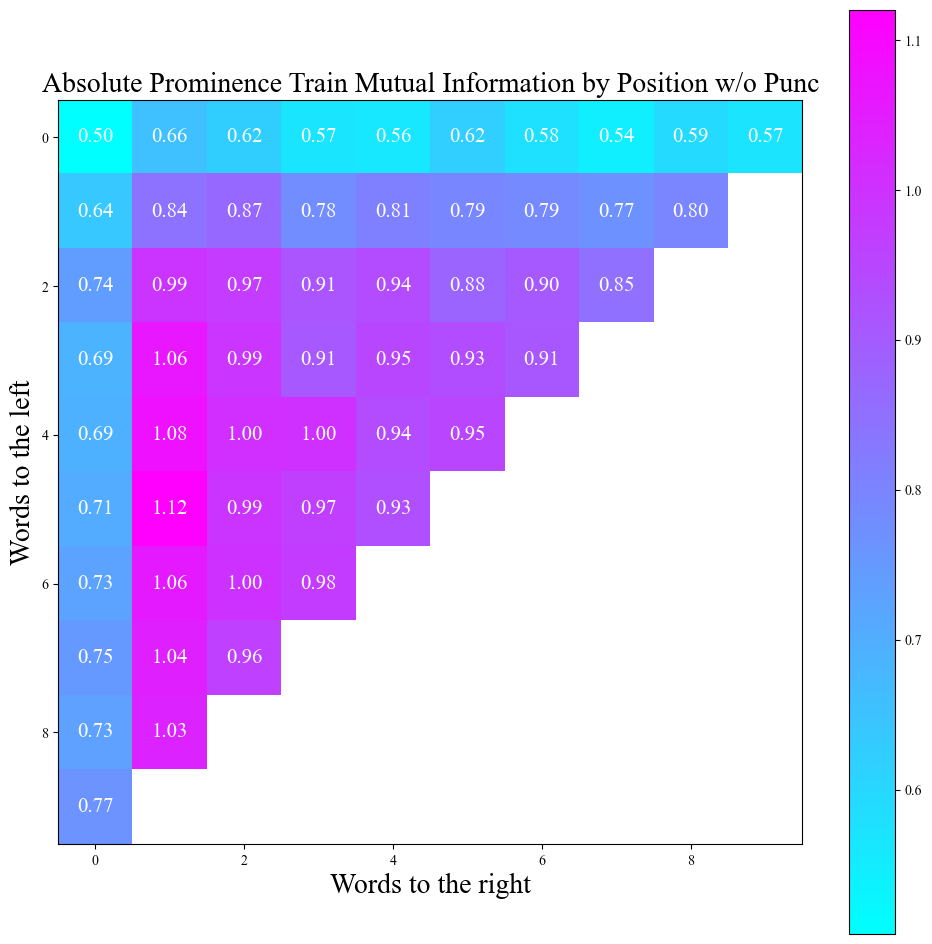

In [53]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
im = ax.imshow(train_mi, cmap="cool")
#im.set_clim(-1.1, -0.3)

for i in range(train_mi.shape[0]):
    for j in range(train_mi.shape[1]):
        text = ax.text(j, i, f"{train_mi[i, j]:.2f}", ha="center", va="center", color="w", fontsize=15, fontfamily="Times New Roman")
cb = plt.colorbar(im)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
plt.tick_params(labelfontfamily="Times New Roman")
plt.xlabel("Words to the right", fontfamily="Times New Roman", fontsize=20)
plt.ylabel("Words to the left", fontfamily="Times New Roman", fontsize=20)
plt.title(f"{featplotdict[feature]} Train Mutual Information by Position w/o Punc", fontfamily="Times New Roman", fontsize=20)

Text(0.5, 1.0, 'Absolute Prominence Train Frequency by Position')

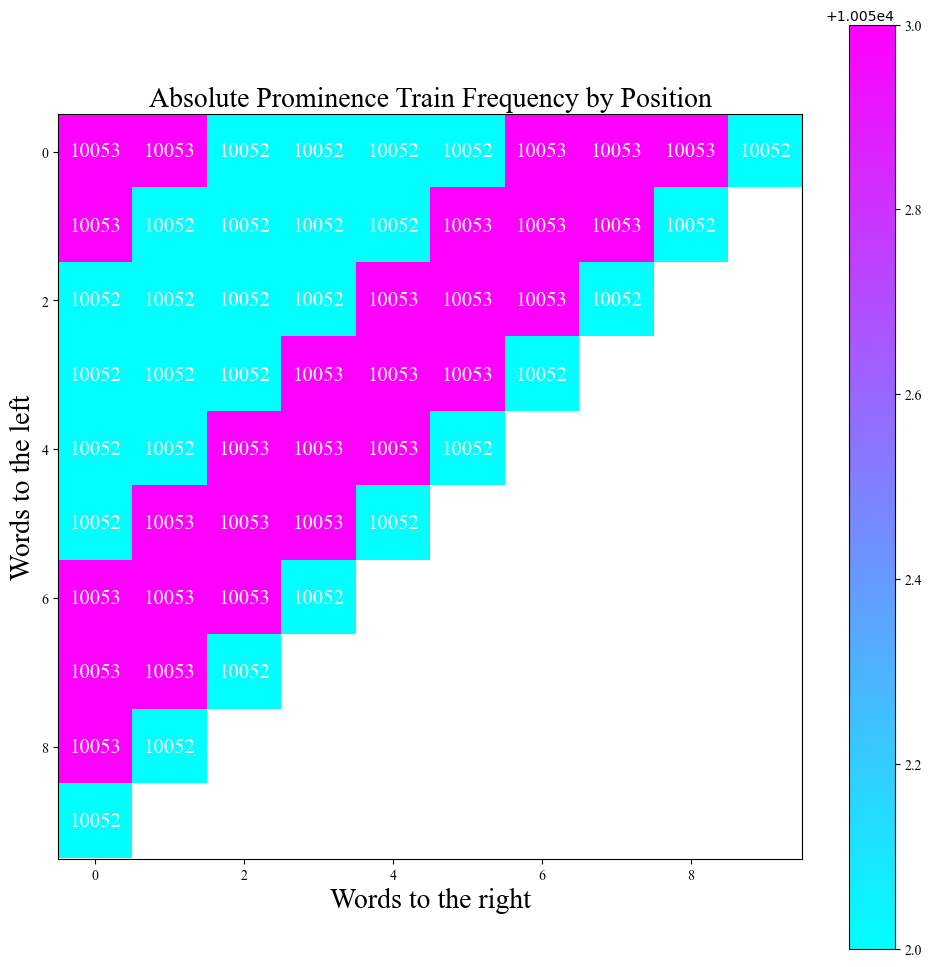

In [54]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
im = ax.imshow(train_freq_total, cmap="cool")

for i in range(train_freq_total.shape[0]):
    for j in range(10-i):
        text = ax.text(j, i, f"{int(train_freq_total[i, j])}", ha="center", va="center", color="w", fontsize=15, fontfamily="Times New Roman")
cb = plt.colorbar(im)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
plt.tick_params(labelfontfamily="Times New Roman")
plt.xlabel("Words to the right", fontfamily="Times New Roman", fontsize=20)
plt.ylabel("Words to the left", fontfamily="Times New Roman", fontsize=20)
plt.title(f"Train Sample Frequency by position")
plt.title(f"{featplotdict[feature]} Train Frequency by Position", fontfamily="Times New Roman", fontsize=20)

Text(0.5, 1.0, 'Absolute Prominence Train Standard Error by Position')

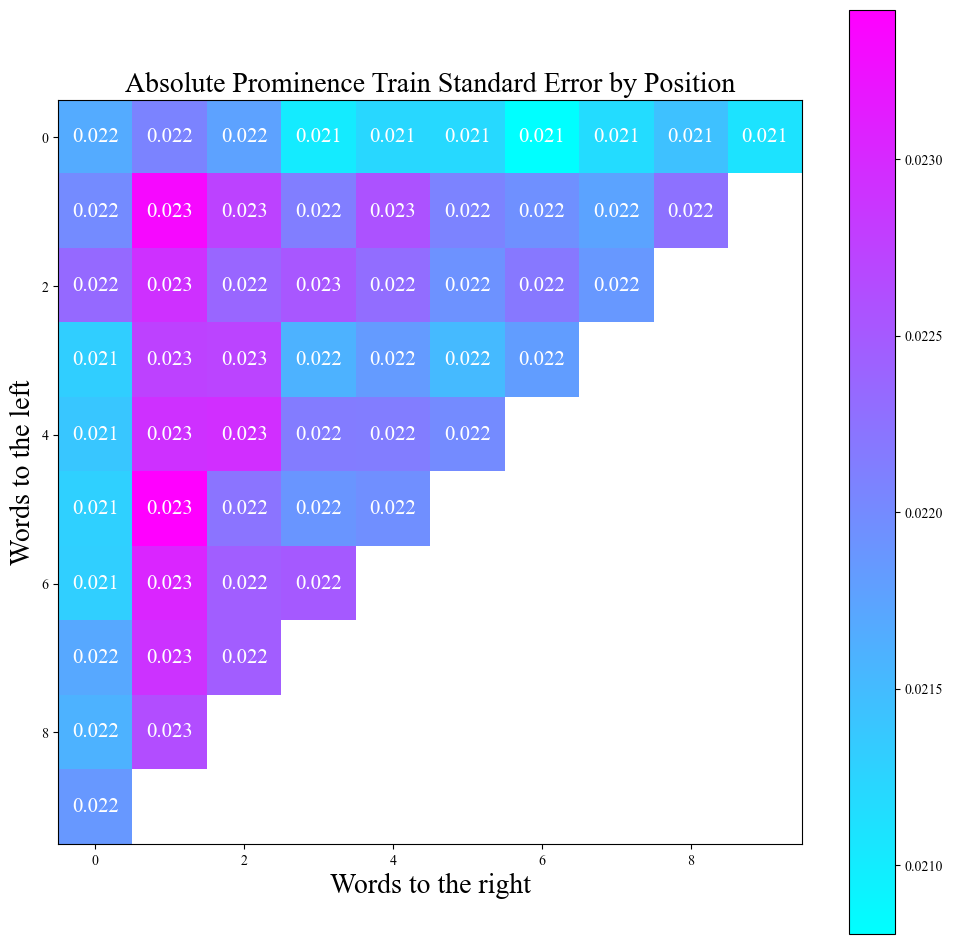

In [55]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
im = ax.imshow(train_loss_stderr, cmap="cool")

for i in range(train_loss_stderr.shape[0]):
    for j in range(train_loss_stderr.shape[1]):
        text = ax.text(j, i, f"{train_loss_stderr[i, j]:.3f}", ha="center", va="center", color="w", fontsize=15, fontfamily="Times New Roman")
cb = plt.colorbar(im)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
plt.tick_params(labelfontfamily="Times New Roman")
plt.xlabel("Words to the right", fontfamily="Times New Roman", fontsize=20)
plt.ylabel("Words to the left", fontfamily="Times New Roman", fontsize=20)
plt.title(f"{featplotdict[feature]} Train Standard Error by Position", fontfamily="Times New Roman", fontsize=20)

In [56]:
test_loss_sum = np.load(f"losses_cm/{name}/test_sum.npy")
test_freq_total = np.load(f"losses_cm/{name}/test_freqs.npy")
test_loss_stderr = np.load(f"losses_cm/{name}/test_stderr.npy")

print(f"Average Test Loss: {np.sum(test_loss_sum) / np.sum(test_freq_total)}")

test_avg_loss = test_loss_sum / test_freq_total
test_freq_total = np.where(test_freq_total == 0, np.nan, test_freq_total)
test_loss_stderr = np.where(test_loss_stderr == 0, np.nan, test_loss_stderr)

test_mi = diff_entropy[feature] - test_avg_loss 

Average Test Loss: -0.16380581558298996


/tmp/ipykernel_10092/924590937.py:7: RuntimeWarning: invalid value encountered in divide
  test_avg_loss = test_loss_sum / test_freq_total


Text(0.5, 1.0, 'Absolute Prominence Test Mutual Information by Position w/o Punc')

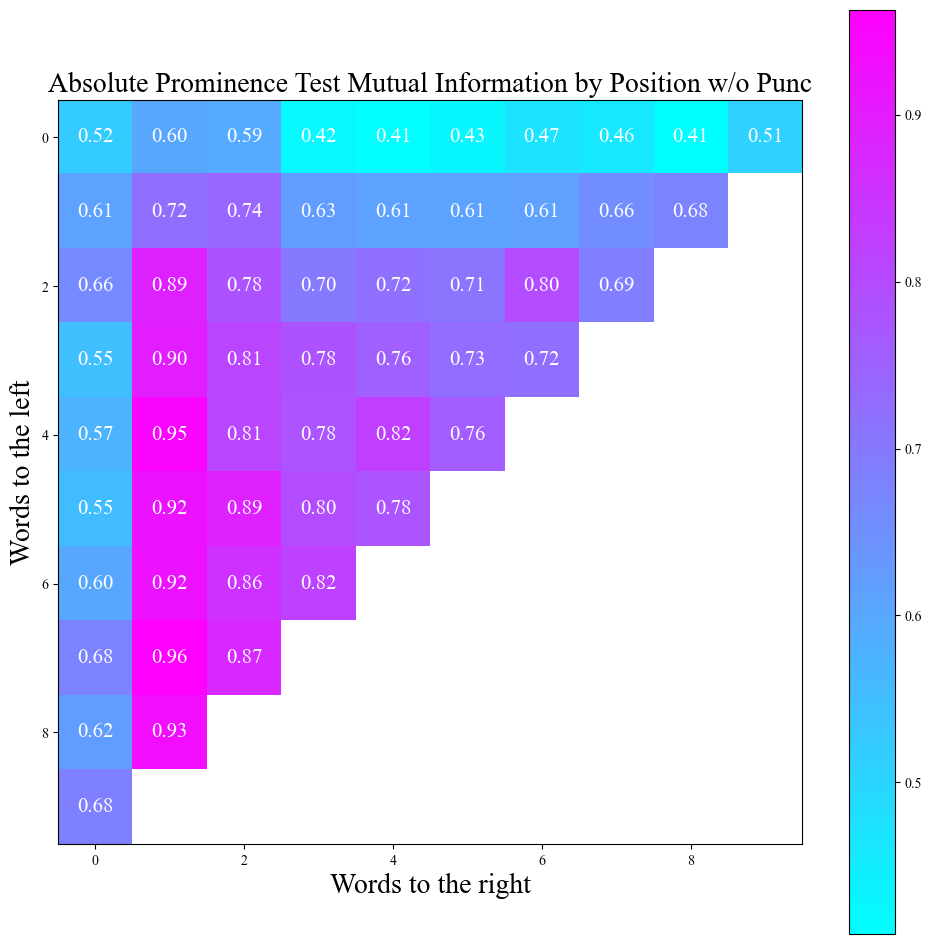

In [57]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
im = ax.imshow(test_mi, cmap="cool")

for i in range(test_mi.shape[0]):
    for j in range(test_mi.shape[1]):
        text = ax.text(j, i, f"{test_mi[i, j]:.2f}", ha="center", va="center", color="w", fontsize=15, fontfamily="Times New Roman")
cb = plt.colorbar(im)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
plt.tick_params(labelfontfamily="Times New Roman")
plt.xlabel("Words to the right", fontfamily="Times New Roman", fontsize=20)
plt.ylabel("Words to the left", fontfamily="Times New Roman", fontsize=20)
plt.title(f"{featplotdict[feature]} Test Mutual Information by Position w/o Punc", fontfamily="Times New Roman", fontsize=20)

Text(0.5, 1.0, 'Absolute Prominence Test Frequency by Position')

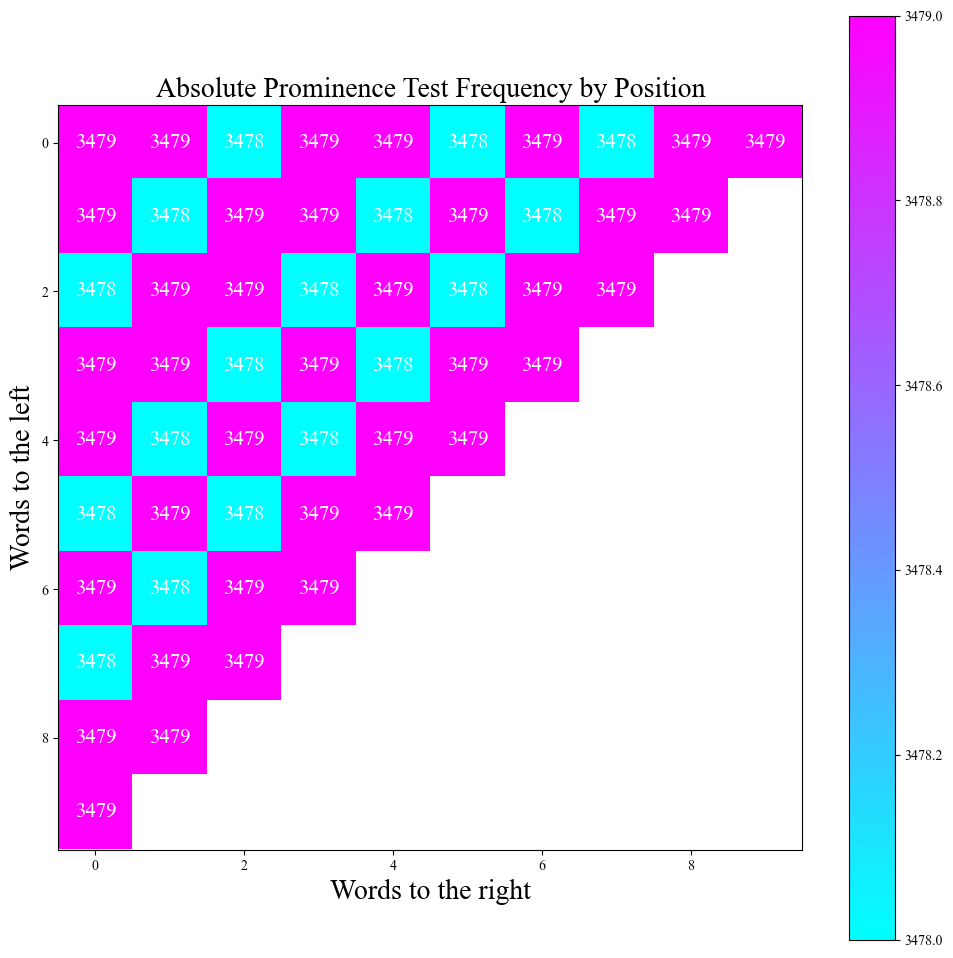

In [58]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
im = ax.imshow(test_freq_total, cmap="cool")

for i in range(test_freq_total.shape[0]):
    for j in range(10-i):
        text = ax.text(j, i, f"{int(test_freq_total[i, j])}", ha="center", va="center", color="w", fontsize=15, fontfamily="Times New Roman")
cb = plt.colorbar(im)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
plt.tick_params(labelfontfamily="Times New Roman")
plt.xlabel("Words to the right", fontfamily="Times New Roman", fontsize=20)
plt.ylabel("Words to the left", fontfamily="Times New Roman", fontsize=20)
plt.title(f"{featplotdict[feature]} Test Frequency by Position", fontfamily="Times New Roman", fontsize=20)

Text(0.5, 1.0, 'Absolute Prominence Test Standard Error by Position')

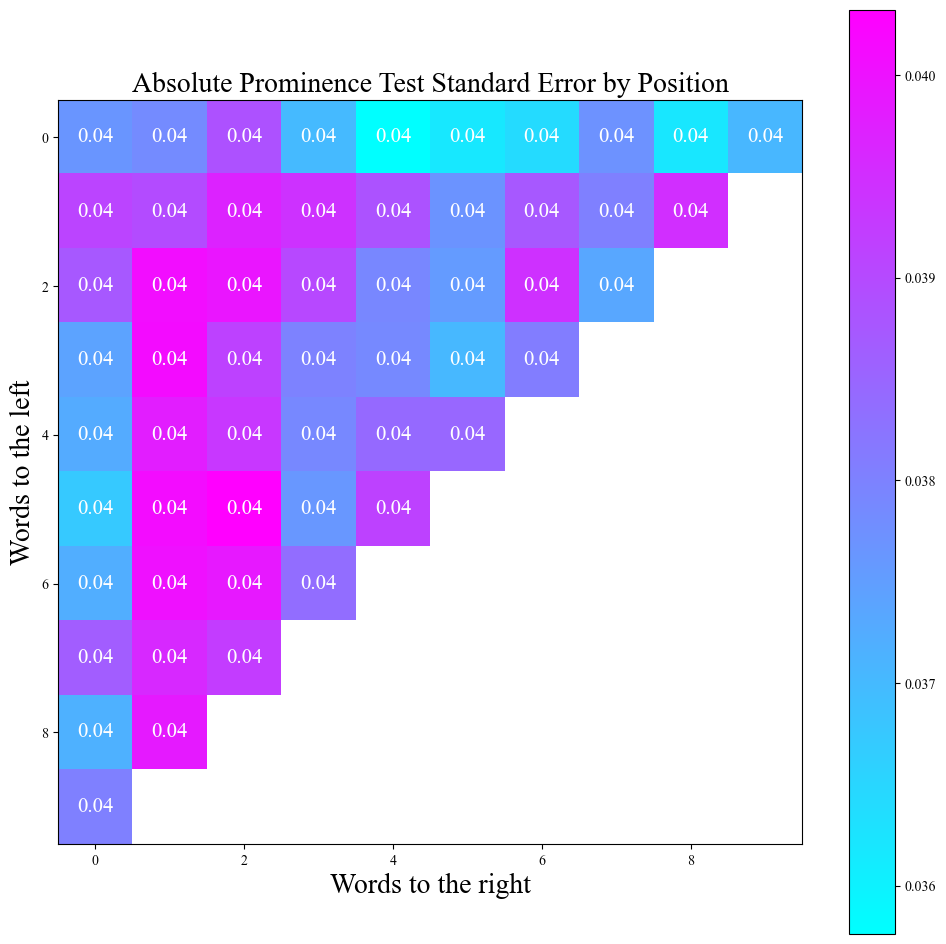

In [59]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
im = ax.imshow(test_loss_stderr, cmap="cool")

for i in range(test_loss_stderr.shape[0]):
    for j in range(test_loss_stderr.shape[1]):
        text = ax.text(j, i, f"{test_loss_stderr[i, j]:.2f}", ha="center", va="center", color="w", fontsize=15, fontfamily="Times New Roman")
cb = plt.colorbar(im)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
plt.tick_params(labelfontfamily="Times New Roman")
plt.xlabel("Words to the right", fontfamily="Times New Roman", fontsize=20)
plt.ylabel("Words to the left", fontfamily="Times New Roman", fontsize=20)
plt.title(f"{featplotdict[feature]} Test Standard Error by Position", fontfamily="Times New Roman", fontsize=20)

In [62]:
all_features = [
    "absolute_prominence",
    "relative_prominence",
    "duration",
    "energy",
    "pause",
    "f0_dct1"
]

names = {
    "absolute_prominence": "absolute_prominence_bert-large-cased",
    "relative_prominence": "relative_prominence_bert-large-cased",
    "duration": "duration_bert-base-cased",
    "energy": "energy_bert-base-cased",
    "pause": "pause_roberta-large",
    "f0_dct1": "f0_dct1_bert-base-cased"
}

epochs = {
    "absolute_prominence": 5,
    "relative_prominence": 5,
    "duration": 17,
    "energy": 5,
    "pause": 5,
    "f0_dct1": 5,
    
}

all_avg_mi_train = np.zeros((10, 10))
all_avg_mi_test = np.zeros((10, 10))

for feature in all_features:
    train_loss_sum = np.load(f"losses_cm/{names[feature]}/train_sum{epochs[feature]}.npy")
    train_freq_total = np.load(f"losses_cm/{names[feature]}/train_freqs{epochs[feature]}.npy")
    
    train_avg_loss = train_loss_sum / train_freq_total
    train_freq_total = np.where(train_freq_total == 0, np.nan, train_freq_total)
    
    train_mi = diff_entropy[feature] - train_avg_loss

    all_avg_mi_train += train_mi

    test_loss_sum = np.load(f"losses_cm/{names[feature]}/test_sum.npy")
    test_freq_total = np.load(f"losses_cm/{names[feature]}/test_freqs.npy")
    
    test_avg_loss = test_loss_sum / test_freq_total
    test_freq_total = np.where(test_freq_total == 0, np.nan, test_freq_total)
    
    test_mi = diff_entropy[feature] - test_avg_loss

    all_avg_mi_test += test_mi

all_avg_mi_train /= len(all_features)
all_avg_mi_test /= len(all_features)

/tmp/ipykernel_10092/326439617.py:36: RuntimeWarning: invalid value encountered in divide
  train_avg_loss = train_loss_sum / train_freq_total
/tmp/ipykernel_10092/326439617.py:46: RuntimeWarning: invalid value encountered in divide
  test_avg_loss = test_loss_sum / test_freq_total


Text(0.5, 1.0, 'Average Mutual Information for All Prosody Features by Position Train')

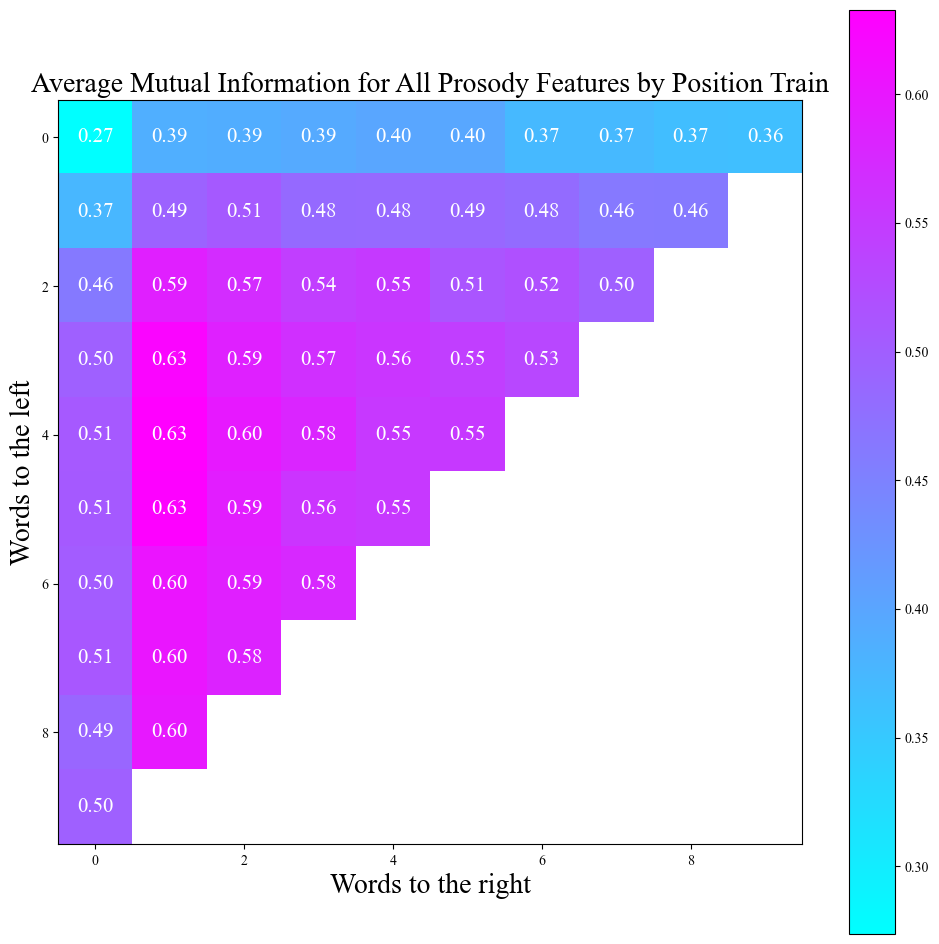

In [63]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
im = ax.imshow(all_avg_mi_train, cmap="cool")
#im.set_clim(-1.1, -0.3)

for i in range(all_avg_mi_train.shape[0]):
    for j in range(all_avg_mi_train.shape[1]):
        text = ax.text(j, i, f"{all_avg_mi_train[i, j]:.2f}", ha="center", va="center", color="w", fontsize=15, fontfamily="Times New Roman")
cb = plt.colorbar(im)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
plt.tick_params(labelfontfamily="Times New Roman")
plt.xlabel("Words to the right", fontfamily="Times New Roman", fontsize=20)
plt.ylabel("Words to the left", fontfamily="Times New Roman", fontsize=20)
plt.title(f"Average Mutual Information for All Prosody Features by Position Train", fontfamily="Times New Roman", fontsize=20)

Text(0.5, 1.0, 'Average Mutual Information for All Prosody Features by Position Test')

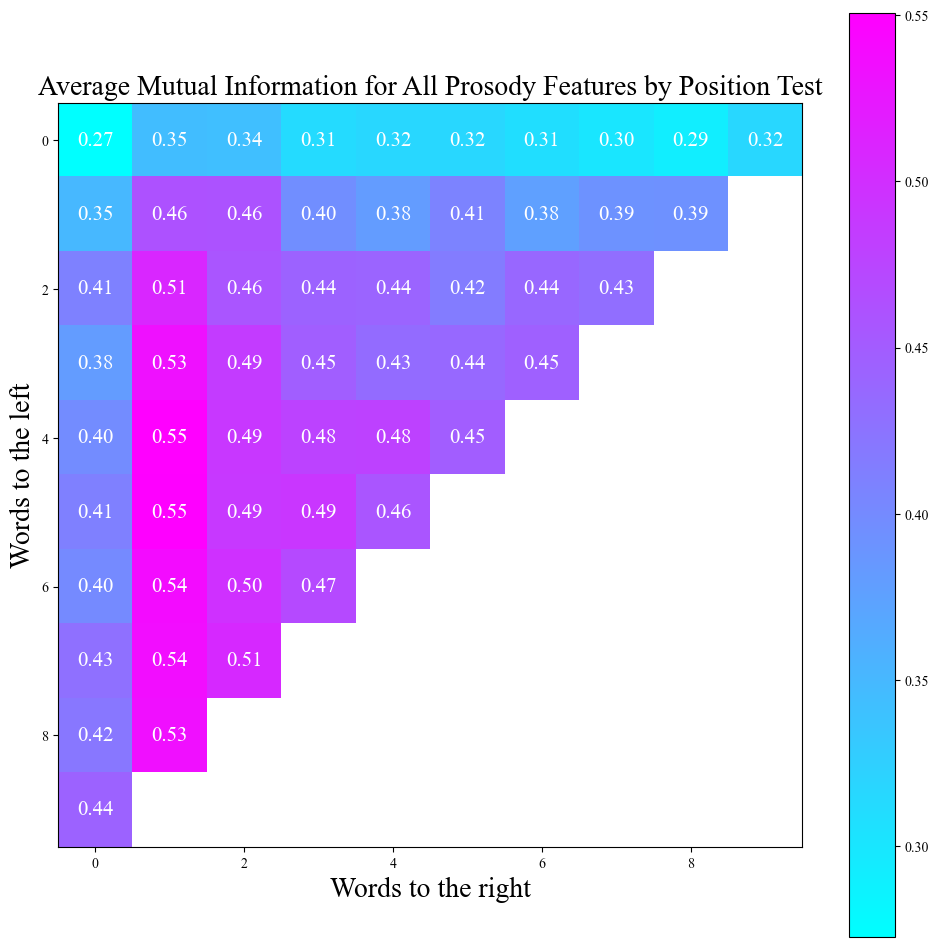

In [64]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
im = ax.imshow(all_avg_mi_test, cmap="cool")

for i in range(all_avg_mi_test.shape[0]):
    for j in range(all_avg_mi_test.shape[1]):
        text = ax.text(j, i, f"{all_avg_mi_test[i, j]:.2f}", ha="center", va="center", color="w", fontsize=15, fontfamily="Times New Roman")
cb = plt.colorbar(im)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
plt.tick_params(labelfontfamily="Times New Roman")
plt.xlabel("Words to the right", fontfamily="Times New Roman", fontsize=20)
plt.ylabel("Words to the left", fontfamily="Times New Roman", fontsize=20)
plt.title(f"Average Mutual Information for All Prosody Features by Position Test", fontfamily="Times New Roman", fontsize=20)